In [633]:
import pandas as pd, numpy as np, time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV

# Librerías para plots
from sklearn import tree
#import graphviz
from scipy.stats import norm
from scipy.stats import t
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime, timedelta
%matplotlib inline

In [634]:
df = pd.read_csv('/Users/lucas_botella/Downloads/df_covid_processed.csv')
del df['Unnamed: 0']
del df['%youth_unemployment_total']
del df['total_vaccinations_per_100']
del df['urban_population']
del df['number_of_arrivals']
df['nurses_per_1000']=df.apply(lambda x: x['nurses_per_1000'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else 
         x['nurses_per_1000'] - (x['nurses_per_1000']*x['Excess mortality P-scores, all ages Prev 18 days']), axis=1)
df['doctors_per_1000']=df.apply(lambda x: x['doctors_per_1000'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else 
         x['doctors_per_1000'] - (x['doctors_per_1000']*x['Excess mortality P-scores, all ages Prev 18 days']), axis=1)
df['beds_per_1000']=df.apply(lambda x: x['beds_per_1000'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else 
         x['beds_per_1000'] - (x['beds_per_1000']*x['Excess mortality P-scores, all ages Prev 18 days']), axis=1)
df

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,income_support,Holiday,temp,prcp,doctors_per_1000,nurses_per_1000,beds_per_1000,life_expectancy,"Excess mortality P-scores, all ages Prev 18 days","Excess mortality P-scores, all ages"
0,AUS,2020-03-09,0.844429,1.513714,-1.051571,6.238714,-1.572286,9.373571,2.0,1.0,...,0.000000,0.000000,23.993035,0.138677,-19.4250,-61.7456,-19.8912,82.748780,6.18,4.92
1,AUS,2020-03-16,0.979571,2.061143,-1.204286,8.938714,-0.102000,11.000000,2.0,1.0,...,0.000000,0.000000,22.457831,0.127666,-13.2375,-42.0776,-13.5552,82.748780,4.53,4.67
2,AUS,2020-03-23,1.285714,7.040857,-0.816143,8.061143,-0.816286,10.183857,2.0,1.0,...,0.000000,0.000000,22.450150,0.127258,-14.7000,-46.7264,-15.0528,82.748780,4.92,4.62
3,AUS,2020-03-30,-0.122286,10.122429,0.102000,2.061143,-1.755143,5.979571,2.0,1.0,...,0.571429,0.000000,21.185806,0.202577,-13.7625,-43.7464,-14.0928,82.748780,4.67,7.28
4,AUS,2020-04-06,-4.489857,23.734571,2.449000,-11.000000,-12.081571,5.081571,2.0,1.0,...,1.000000,0.000000,21.022863,0.081643,-13.5750,-43.1504,-13.9008,82.748780,4.62,12.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,USA,2021-01-18,-25.224571,-9.775571,14.102286,-41.081571,-15.591714,-44.102000,1.0,3.0,...,2.000000,0.142857,2.653869,0.064622,-104.5827,-476.4323,-115.0009,78.539024,41.07,36.74
2078,USA,2021-01-25,-23.653143,-10.571429,12.591857,-40.000000,-20.244857,-34.122429,1.0,3.0,...,2.000000,0.000000,2.381650,0.100622,-114.1875,-520.1875,-125.5625,78.539024,44.75,33.91
2079,USA,2021-02-01,-24.387714,-11.836714,10.897857,-39.938714,-22.000000,-27.754857,1.0,3.0,...,2.000000,0.000000,1.709189,0.031404,-93.2814,-424.9486,-102.5738,78.539024,36.74,29.53
2080,USA,2021-02-08,-25.040857,-13.693857,10.816143,-40.816429,-17.673571,-29.857143,1.0,3.0,...,2.000000,0.142857,2.679674,0.038808,-85.8951,-391.2999,-94.4517,78.539024,33.91,24.53


In [635]:
accumulated=[]
country='AUS'
cumsum=0
for index, row in df.iterrows():
    country_last=row['Code']
    
    if(country!=country_last):
        
        cumsum=0
        country=row['Code']
        
    else:
        
        if(row['Excess mortality P-scores, all ages Prev 18 days']  > 0):
            cumsum=cumsum+row['Excess mortality P-scores, all ages Prev 18 days'] 
    
    accumulated.append(cumsum)
df['accumulated']=accumulated
df=df[[c for c in df if c not in ['Excess mortality P-scores, all ages']] 
       + ['Excess mortality P-scores, all ages']]

In [636]:
df

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,Holiday,temp,prcp,doctors_per_1000,nurses_per_1000,beds_per_1000,life_expectancy,"Excess mortality P-scores, all ages Prev 18 days",accumulated,"Excess mortality P-scores, all ages"
0,AUS,2020-03-09,0.844429,1.513714,-1.051571,6.238714,-1.572286,9.373571,2.0,1.0,...,0.000000,23.993035,0.138677,-19.4250,-61.7456,-19.8912,82.748780,6.18,6.18,4.92
1,AUS,2020-03-16,0.979571,2.061143,-1.204286,8.938714,-0.102000,11.000000,2.0,1.0,...,0.000000,22.457831,0.127666,-13.2375,-42.0776,-13.5552,82.748780,4.53,10.71,4.67
2,AUS,2020-03-23,1.285714,7.040857,-0.816143,8.061143,-0.816286,10.183857,2.0,1.0,...,0.000000,22.450150,0.127258,-14.7000,-46.7264,-15.0528,82.748780,4.92,15.63,4.62
3,AUS,2020-03-30,-0.122286,10.122429,0.102000,2.061143,-1.755143,5.979571,2.0,1.0,...,0.000000,21.185806,0.202577,-13.7625,-43.7464,-14.0928,82.748780,4.67,20.30,7.28
4,AUS,2020-04-06,-4.489857,23.734571,2.449000,-11.000000,-12.081571,5.081571,2.0,1.0,...,0.000000,21.022863,0.081643,-13.5750,-43.1504,-13.9008,82.748780,4.62,24.92,12.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,USA,2021-01-18,-25.224571,-9.775571,14.102286,-41.081571,-15.591714,-44.102000,1.0,3.0,...,0.142857,2.653869,0.064622,-104.5827,-476.4323,-115.0009,78.539024,41.07,1026.53,36.74
2078,USA,2021-01-25,-23.653143,-10.571429,12.591857,-40.000000,-20.244857,-34.122429,1.0,3.0,...,0.000000,2.381650,0.100622,-114.1875,-520.1875,-125.5625,78.539024,44.75,1071.28,33.91
2079,USA,2021-02-01,-24.387714,-11.836714,10.897857,-39.938714,-22.000000,-27.754857,1.0,3.0,...,0.000000,1.709189,0.031404,-93.2814,-424.9486,-102.5738,78.539024,36.74,1108.02,29.53
2080,USA,2021-02-08,-25.040857,-13.693857,10.816143,-40.816429,-17.673571,-29.857143,1.0,3.0,...,0.142857,2.679674,0.038808,-85.8951,-391.2999,-94.4517,78.539024,33.91,1141.93,24.53


!conda install -c conda-forge feature_engine

In [637]:
from sklearn.preprocessing import KBinsDiscretizer

In [638]:
#df['total_vaccinations_per_100'].fillna(0)
df=df.fillna(df.median())

In [639]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

In [640]:
X=df[df.columns[2:-1]]
y=pd.DataFrame(df[df.columns[-1]])

In [641]:
discretizer.fit(y)
Yt = discretizer.transform(y)

In [642]:
Yt.size

2082

In [643]:
Yt=pd.DataFrame(Yt)
df['target']=Yt
df_aux=df[df.columns]
del df['Excess mortality P-scores, all ages']
X=df[df.columns[2:-1]]
y=df['target']
X

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,international_travel_controls,restrictions_internal_movements,...,income_support,Holiday,temp,prcp,doctors_per_1000,nurses_per_1000,beds_per_1000,life_expectancy,"Excess mortality P-scores, all ages Prev 18 days",accumulated
0,0.844429,1.513714,-1.051571,6.238714,-1.572286,9.373571,2.0,1.0,3.000000,0.000000,...,0.000000,0.000000,23.993035,0.138677,-19.4250,-61.7456,-19.8912,82.748780,6.18,6.18
1,0.979571,2.061143,-1.204286,8.938714,-0.102000,11.000000,2.0,1.0,3.000000,0.000000,...,0.000000,0.000000,22.457831,0.127666,-13.2375,-42.0776,-13.5552,82.748780,4.53,10.71
2,1.285714,7.040857,-0.816143,8.061143,-0.816286,10.183857,2.0,1.0,3.000000,0.000000,...,0.000000,0.000000,22.450150,0.127258,-14.7000,-46.7264,-15.0528,82.748780,4.92,15.63
3,-0.122286,10.122429,0.102000,2.061143,-1.755143,5.979571,2.0,1.0,3.000000,0.000000,...,0.571429,0.000000,21.185806,0.202577,-13.7625,-43.7464,-14.0928,82.748780,4.67,20.30
4,-4.489857,23.734571,2.449000,-11.000000,-12.081571,5.081571,2.0,1.0,3.428571,1.142857,...,1.000000,0.000000,21.022863,0.081643,-13.5750,-43.1504,-13.9008,82.748780,4.62,24.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,-25.224571,-9.775571,14.102286,-41.081571,-15.591714,-44.102000,1.0,3.0,3.000000,2.000000,...,2.000000,0.142857,2.653869,0.064622,-104.5827,-476.4323,-115.0009,78.539024,41.07,1026.53
2078,-23.653143,-10.571429,12.591857,-40.000000,-20.244857,-34.122429,1.0,3.0,3.000000,2.000000,...,2.000000,0.000000,2.381650,0.100622,-114.1875,-520.1875,-125.5625,78.539024,44.75,1071.28
2079,-24.387714,-11.836714,10.897857,-39.938714,-22.000000,-27.754857,1.0,3.0,3.000000,2.000000,...,2.000000,0.000000,1.709189,0.031404,-93.2814,-424.9486,-102.5738,78.539024,36.74,1108.02
2080,-25.040857,-13.693857,10.816143,-40.816429,-17.673571,-29.857143,1.0,3.0,3.000000,2.000000,...,2.000000,0.142857,2.679674,0.038808,-85.8951,-391.2999,-94.4517,78.539024,33.91,1141.93


In [644]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
2077    1.0
2078    1.0
2079    1.0
2080    1.0
2081    1.0
Name: target, Length: 2082, dtype: float64

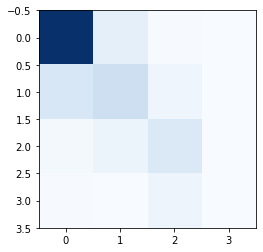

In [645]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
plt.imshow(cm, cmap=plt.cm.Blues) #plot confusion matrix grid

In [646]:
from sklearn import metrics
print(metrics.classification_report(y_test, dtree_predictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.849     0.910     0.878       321
         1.0      0.579     0.517     0.546       120
         2.0      0.586     0.641     0.612        64
         3.0      0.000     0.000     0.000        16

    accuracy                          0.758       521
   macro avg      0.503     0.517     0.509       521
weighted avg      0.728     0.758     0.742       521



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [647]:
df_aux[df_aux['target']==3.0].describe()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,international_travel_controls,restrictions_internal_movements,...,temp,prcp,doctors_per_1000,nurses_per_1000,beds_per_1000,life_expectancy,"Excess mortality P-scores, all ages Prev 18 days",accumulated,"Excess mortality P-scores, all ages",target
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,-50.036659,-20.278107,17.210666,-48.408492,-31.533373,-37.994126,1.234867,1.496368,2.777240,1.585956,...,15.110804,0.057249,-166.783849,-252.131622,-248.754334,77.632678,91.783051,836.756610,106.040000,3.0
std,19.180207,18.196396,7.647891,17.930305,24.381754,16.327201,0.537649,0.564836,1.032297,0.732139,...,8.294588,0.065431,125.742785,264.694236,218.008142,2.940660,65.781183,869.396037,27.453521,0.0
min,-90.734857,-66.020429,3.591857,-84.530571,-82.489857,-77.163143,0.000000,1.000000,0.000000,0.000000,...,-0.654406,0.000000,-550.297800,-1091.571000,-927.152500,74.063000,2.540000,10.430000,80.810000,3.0
25%,-62.806143,-31.428571,11.979714,-58.795857,-44.540786,-42.204071,1.000000,1.000000,2.500000,1.285714,...,8.291170,0.013597,-239.144400,-309.002700,-388.949050,74.992000,58.110000,242.755000,88.580000,3.0
50%,-43.285571,-16.244857,15.449000,-47.081714,-36.714286,-32.836714,1.000000,1.000000,3.000000,2.000000,...,15.729157,0.035650,-173.118000,-205.405900,-158.865300,76.800000,85.810000,491.960000,97.710000,3.0
75%,-36.693714,-7.673429,20.816429,-38.336714,-13.336643,-27.703929,2.000000,2.000000,3.000000,2.000000,...,22.568893,0.077613,-16.938300,-42.533600,-91.634900,81.256098,104.795000,1115.180000,108.525000,3.0
max,-20.714429,9.857143,36.061143,-10.469286,20.122286,-15.755000,2.000000,3.000000,4.000000,2.000000,...,27.906206,0.304844,-16.938300,-42.533600,-2.140600,83.431707,408.550000,3054.490000,225.590000,3.0


In [648]:
df_aux

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,temp,prcp,doctors_per_1000,nurses_per_1000,beds_per_1000,life_expectancy,"Excess mortality P-scores, all ages Prev 18 days",accumulated,"Excess mortality P-scores, all ages",target
0,AUS,2020-03-09,0.844429,1.513714,-1.051571,6.238714,-1.572286,9.373571,2.0,1.0,...,23.993035,0.138677,-19.4250,-61.7456,-19.8912,82.748780,6.18,6.18,4.92,0.0
1,AUS,2020-03-16,0.979571,2.061143,-1.204286,8.938714,-0.102000,11.000000,2.0,1.0,...,22.457831,0.127666,-13.2375,-42.0776,-13.5552,82.748780,4.53,10.71,4.67,0.0
2,AUS,2020-03-23,1.285714,7.040857,-0.816143,8.061143,-0.816286,10.183857,2.0,1.0,...,22.450150,0.127258,-14.7000,-46.7264,-15.0528,82.748780,4.92,15.63,4.62,0.0
3,AUS,2020-03-30,-0.122286,10.122429,0.102000,2.061143,-1.755143,5.979571,2.0,1.0,...,21.185806,0.202577,-13.7625,-43.7464,-14.0928,82.748780,4.67,20.30,7.28,0.0
4,AUS,2020-04-06,-4.489857,23.734571,2.449000,-11.000000,-12.081571,5.081571,2.0,1.0,...,21.022863,0.081643,-13.5750,-43.1504,-13.9008,82.748780,4.62,24.92,12.13,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,USA,2021-01-18,-25.224571,-9.775571,14.102286,-41.081571,-15.591714,-44.102000,1.0,3.0,...,2.653869,0.064622,-104.5827,-476.4323,-115.0009,78.539024,41.07,1026.53,36.74,1.0
2078,USA,2021-01-25,-23.653143,-10.571429,12.591857,-40.000000,-20.244857,-34.122429,1.0,3.0,...,2.381650,0.100622,-114.1875,-520.1875,-125.5625,78.539024,44.75,1071.28,33.91,1.0
2079,USA,2021-02-01,-24.387714,-11.836714,10.897857,-39.938714,-22.000000,-27.754857,1.0,3.0,...,1.709189,0.031404,-93.2814,-424.9486,-102.5738,78.539024,36.74,1108.02,29.53,1.0
2080,USA,2021-02-08,-25.040857,-13.693857,10.816143,-40.816429,-17.673571,-29.857143,1.0,3.0,...,2.679674,0.038808,-85.8951,-391.2999,-94.4517,78.539024,33.91,1141.93,24.53,1.0


In [649]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [650]:
# Model performance on training set
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train))

Accuracy: 0.77
Confusion Matrix: 
 [[907  57   2   0   0]
 [163 164  45   1   0]
 [ 17  44 108   8   0]
 [  1   3  19  20   0]
 [  1   0   0   1   0]]
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       966
         1.0       0.61      0.44      0.51       373
         2.0       0.62      0.61      0.62       177
         3.0       0.67      0.47      0.55        43
         4.0       0.00      0.00      0.00         2

    accuracy                           0.77      1561
   macro avg       0.55      0.49      0.51      1561
weighted avg       0.75      0.77      0.75      1561



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [651]:
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.76
Confusion Matrix: 
 [[296  23   2   0]
 [ 52  52  16   0]
 [  6  17  40   1]
 [  2   0   6   8]]
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       321
         1.0       0.57      0.43      0.49       120
         2.0       0.62      0.62      0.62        64
         3.0       0.89      0.50      0.64        16

    accuracy                           0.76       521
   macro avg       0.73      0.62      0.66       521
weighted avg       0.75      0.76      0.75       521



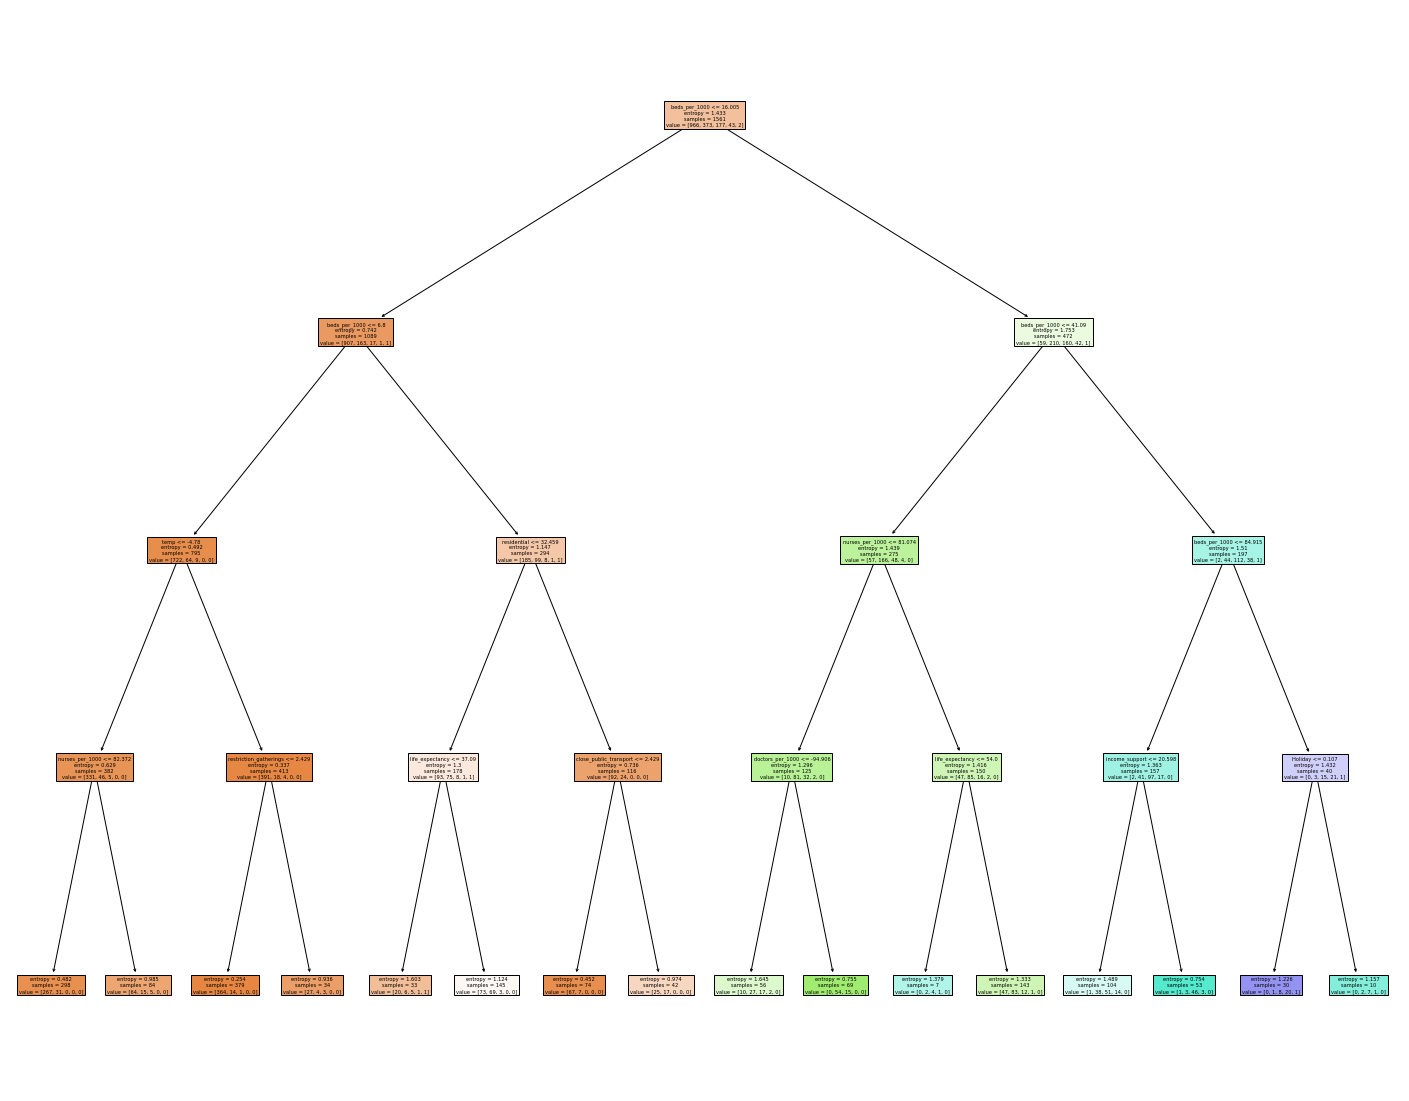

In [652]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=df.columns,  
                   filled=True)

In [653]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

model = XGBClassifier(objective='multi:softprob') 

model.fit(X_train, y_train)

y_pred = model.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

Accuracy: 80.23%
Confusion Matrix: 
 [[296  23   2   0]
 [ 52  52  16   0]
 [  6  17  40   1]
 [  2   0   6   8]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       321
         1.0       0.61      0.62      0.62       120
         2.0       0.80      0.67      0.73        64
         3.0       1.00      0.50      0.67        16

    accuracy                           0.80       521
   macro avg       0.82      0.68      0.73       521
weighted avg       0.80      0.80      0.80       521



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

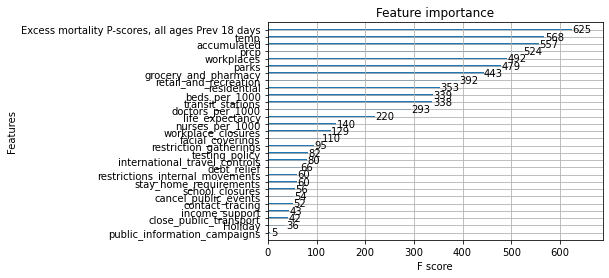

In [654]:
from xgboost import plot_importance
plot_importance(model)

pip install shap

In [655]:
import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

In [656]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

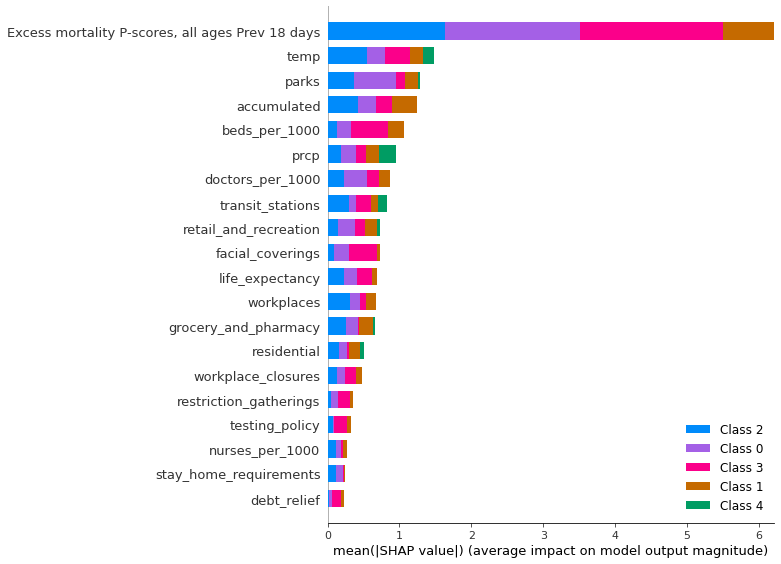

In [657]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

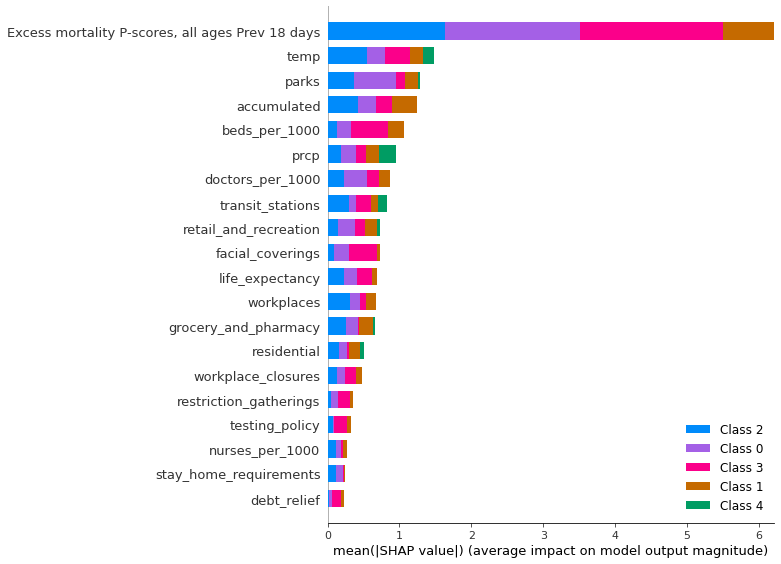

In [658]:
shap.summary_plot(shap_values, X_test)